In [1]:
from ifapp.analize_data import gdal, np, plt, gdal_array
from ifapp.analize_data import func_Mlearn, func_raster
from ifapp.save_load_pkl import pkl_model_load, pkl_model_save

gdal.AllRegister()
gdal.UseExceptions()

In [2]:
dir_raster = r"F:\My Drive\Shared TIF File\Forests2020\SAHID\FELLIKS\TESTING FILE\TIF TEST"
dir_model_ml = r"Data\Data Model"
load_ml_model = pkl_model_load(dir_model_ml + '/L6n7_SVRnoNDVI_rbf.pkl')
print(load_ml_model)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Text(0.5, 1.0, 'DATA LandSat')

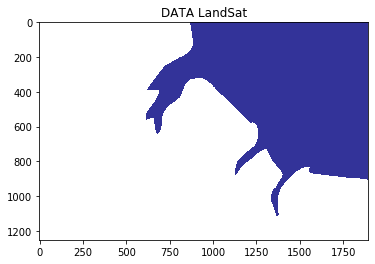

In [3]:
"""If your data is breakdown you can use the nstc """
# load_raster_nstc = Raster_Func.stack_data(Raster_Func, input_path=dir_raster,
#                                          name="_wNDVI030320")
load_raster_stc = gdal.Open(dir_raster + '/Brick Raster 2_wNDVI.TIF')
img2num = func_raster.ras2num(load_raster_stc)
plt.imshow(img2num[:, :, 2], cmap=plt.get_cmap('terrain'))
plt.title('DATA Visualization')

In [4]:
## Prediction model with data image
new_shape = (img2num.shape[0] * img2num.shape[1], img2num.shape[2])
img_as_array = img2num[:, :, :6].reshape(new_shape)
# img_as_array[np.isnan(img_as_array)] = 0
img_as_array = np.nan_to_num(img_as_array)
print('Reshaped from {o} to {n}'.format(o=img2num.shape, n=img_as_array.shape))

Reshaped from (1253, 1893, 6) to (2371929, 6)


In [ ]:


model2data_pred = load_ml_model.predict(img_as_array)
model2data = model2data_pred.reshape(img[:, :, 0].shape)
# sc = MinMaxScaler()
# model2data_pred = sc.fit_transform(model2data)
# model2data = model2data_pred
model2data[model2data < 0.00] = 0.00
model2data[model2data > 1.00] = 1.00
final_pred = model2data * AOI ## SVR
print(final_pred)